In [1]:
import numpy as np# Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
plt.style.use('default')

## 1. Описание задачи
***

Данными для задачи является набор объявлений о продаже `423857` поддержанных автомобилей на территории США. Данные собраны с портала Craigslist.org - самой большой в мире коллекции подержанных автомобилей 


##### Постановка задачи:
С помощью методов машинного обучения, научить модель определять `condition` - состояние машины:

| Состояние | Описание на русском | 
| ---- | ---- |
| 'excellent' | превосходное, уникальное |
| 'new' | новое, но без изысков |
| 'like new' | с пробегом, но работает как новая |
| 'good' | хорошее |
| 'fair' | удовлетворительное |
| 'salvage' | неудовлетворительное |



## 2. Чтение и разбор данных
***

In [2]:
url = "vehicles.csv"
full_data = pd.read_csv(url) # Читаем данные

In [3]:
full_data.shape # Получаем размерность данных

(423857, 25)

##### Обзор данных и их типов:
1. `id` - уникальный номер объявления, `номинальный`	
2. `url` - ссылка на объявление о продаже, `номинальный`	
3. `region` - регион продажи автомобиля, `номинальный`	
4. `region_url` - ссылка на домен региона продажи, `номинальный`	
5. `price` - стоимость машины в долларах, `количественный`	
6. `year` - год выпуска машины, `номинальный`	
7. `manufacturer` - марка машины, `номинальный`	
8. `model` - модель машины, `номинальный`	
9. `condition` - состояние машины, `номинальный`	
10. `cylinders` - количество цилиндров в двигателе, `номинальный`	
11. `fuel` - тип двигателя, `номинальный`	
12. `odometer` - пробег, `количественный`	
13. `title_status` - официальный статус в государственном реестре 
(чистая, в залоге, угнана, только на запчасти, востановленная, металлолом), `номинальный`
14. `transmission` - тип коробки передач, `номинальный`	
15. `vin` - уникальный идентификационный номер машины, `номинальный`	
16. `drive` - тип привода (передний, задний, 4x4), `номинальный`	
17. `size` - габариты машины, `номинальный`	
18. `type` - тип кузова, `номинальный`	
19. `paint_color` - цвет машины, `номинальный`	
20. `image_url` - сслыка на фотографию, `номинальный`	
21. `description` - мета-тег дескриптор страницы объявления, `номинальный`
22. `county` - страна продажи автомобиля, `номинальный`
23. `state` - штат продажи автомобиля, `номинальный`	
24. `lat` - широта, `количественный`	
25. `long` - долгота, `количественный`

In [4]:
full_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

##### Обзор данных:

С помощью метода `Dataframe.describe()` библиотеки `pandas`, осмотрим наши столбцы данных на наличе пустых столбов, аномалий или закономерностей
###### Для номинальных признаков
`count` - количество значений 

`unique` - количество уникальных значений в каждом столбце

`top` - самое распространенное значение

`freq` - частота наиболее распространенного значения

###### Для количественных признаков:
`mean` - Среднее арифметическое

`std` - Стандартное отклонение

`min` - Минимальное значение

`25%` - Квартиль уровня (1/4)

`50%` - Медиана

`75%` - Квартиль уровня (3/4)

`max` - Максимальное значение

In [5]:
full_data.iloc[:,:15].describe(include="all")

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin
count,4.238570e+05,423857,423857,423857,4.238570e+05,328743.000000,313242,325384,176719,197679,327214,2.705850e+05,327759,328065,184420
unique,NaN,423857,404,413,NaN,NaN,43,27042,6,8,5,NaN,6,3,103588
top,NaN,https://norfolk.craigslist.org/ctd/d/virginia-...,columbus,https://salem.craigslist.org,NaN,NaN,ford,f-150,excellent,6 cylinders,gas,NaN,clean,automatic,1HTMRAAM19J040080
freq,NaN,1,3296,2985,NaN,NaN,59786,6073,85254,70130,286775,NaN,315607,292619,133
mean,7.190602e+09,NaN,NaN,NaN,5.779437e+04,2009.827358,NaN,NaN,NaN,NaN,NaN,9.942578e+04,NaN,NaN,NaN
std,5.159269e+06,NaN,NaN,NaN,1.002581e+07,10.135809,NaN,NaN,NaN,NaN,NaN,1.204833e+05,NaN,NaN,NaN
min,7.178302e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,7.186688e+09,NaN,NaN,NaN,4.499000e+03,2007.000000,NaN,NaN,NaN,NaN,NaN,4.432400e+04,NaN,NaN,NaN
50%,7.192068e+09,NaN,NaN,NaN,9.995000e+03,2012.000000,NaN,NaN,NaN,NaN,NaN,9.174900e+04,NaN,NaN,NaN
75%,7.194909e+09,NaN,NaN,NaN,1.899500e+04,2016.000000,NaN,NaN,NaN,NaN,NaN,1.372370e+05,NaN,NaN,NaN


In [6]:
full_data.iloc[:,15:].describe(include="all")

,drive,size,type,paint_color,image_url,description,county,state,lat,long
count,231119,102627,241157,222203,329661,329654,0.0,423857,324404.000000,324404.000000
unique,3,4,13,12,222413,275765,NaN,51,NaN,NaN
top,4wd,full-size,sedan,white,https://images.craigslist.org/00H0H_lwWjXSEWNa...,VISIT OUR WEBSITE WWW.DIRECTDETAILOFOH.COM HTT...,NaN,ca,NaN,NaN
freq,99347,52820,64842,57646,2106,144,NaN,45798,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.731429,-93.949367
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.902977,17.930566
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.386400,-161.394000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.054500,-106.678000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.366900,-88.009900
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.517075,-80.832500


* Благодаря такой проверке был обнаружен пустой столбец - `county`, который мы исключим из данных при дальнейшей работе


* Самое встречаемое значение наших классов состояния машин - `excellent`, количество непропущенных строк даных - `176719`, а частота входжения - `85254`, что составляет - `48%` значений всего класса, а значит наши классы по этому столбцу - сбалансированны 
(при условии что баланс считаем нарушенным если, один класс занимает более 75% от класса)

* Так же видно что данные содержат пропущенные значения в некоторых столбцах

## 3 Визуализация данных и описательная статистика
***

Рассмотрим диаграмму по двум количественным признакам - цене от пробегу автомобиля, предполагаем что эти данные зависимы т.к с ростом пробега, будет уменьшатся цена автомобиля

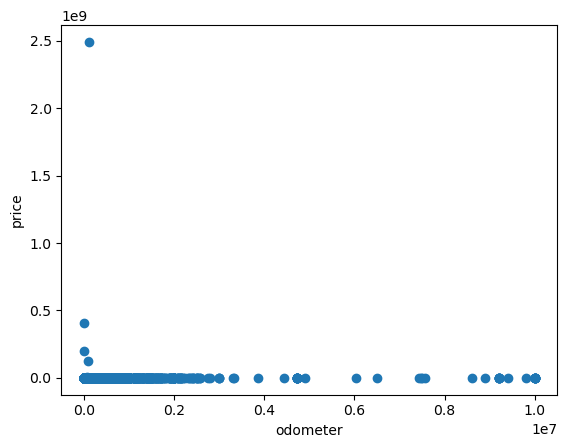

In [7]:
plt.scatter(full_data['odometer'], full_data['price']) 
plt.xlabel('odometer')
plt.ylabel('price')
pass

Видим большие выбросы, не дающие адекватно рассмотреть диаграмму рассеивания от наших двух признаков, попробуем рассмотреть диаграмму на рандомной выборке для 1000 объектов

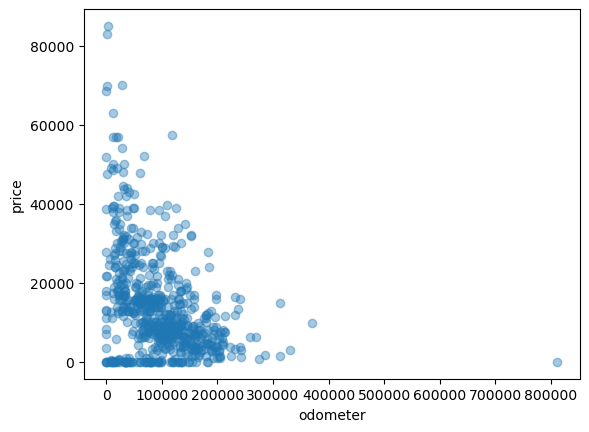

In [8]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(full_data.shape[0]), size=1000, replace=False)

plt.scatter(full_data.iloc[random_subset]['odometer'], full_data.iloc[random_subset]['price'], alpha=0.4)
plt.xlabel('odometer')
plt.ylabel('price')
pass

Видим, что большие величины выбросов не дают возможность адекватно визуализировать диаграмму, но что хуже будут мешать обучению модели, т.к. исказят статистику или результаты статистических расчетов.

##### Обнаружение и очистка от выбросов: 
Для обнаружения выбросов найдем, квантили для признаков `odometer` и `price`

In [9]:
full_data['price'].quantile([0.005,.01,.05,.080,.09,.1,.5,.9,.95,.99,.995])

0.005        0.00
0.010        0.00
0.050        0.00
0.080        0.00
0.090      146.04
0.100      389.60
0.500     9995.00
0.900    31500.00
0.950    39950.00
0.990    61500.00
0.995    71995.00
Name: price, dtype: float64

In [10]:
full_data['price'].max()

3808256046

Рассмотрим квартили уровней 0.005 - 0.080, которые говорят что около $7.5\%$ машин - "бесплатные", эти данные мы отсечем, т.к. это снижает корреляцию между параметрами

Для работы возьмем интервал от 0.090 до 0.995 - это $90.5\%$ данных

In [11]:
full_data['odometer'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         0.0
0.010        10.0
0.050     10081.0
0.100     20292.0
0.500     91749.0
0.900    179744.0
0.950    205554.2
0.990    275961.2
0.995    330000.0
Name: odometer, dtype: float64

In [12]:
full_data['odometer'].max()

10000000.0

Аналогично рассматриваем данные о пробеге автомобиля. В данном случае пробег у машины может быть нулевой если она новая, и такие данные уже будут адекватно вписываться в модель обучения. Их исключать мы не будем, и возьмем $99.0\%$ данных, с пробегами в промежутках от `0км` до `330'000км`

In [13]:
full_data['year'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    1954.0
0.010    1965.0
0.050    1995.0
0.100    2002.0
0.500    2012.0
0.900    2018.0
0.950    2019.0
0.990    2020.0
0.995    2020.0
Name: year, dtype: float64

In [14]:
full_data['year'].max()

2021.0

Машин 2021 пока не могло выйти, так что и этот параметр содержит выбросы, его мы тоже очищаем

Создадим новую переменную `clear_data` - куда занесем только очищенные данные

In [15]:
rows_to_drop = full_data[
    (full_data['price'] < full_data['price'].quantile(0.090)) | (full_data['price'] > full_data['price'].quantile(0.995)) | 
    (full_data['odometer']  < full_data['odometer'].quantile(0.005)) | (full_data['odometer']  > full_data['odometer'].quantile(0.995)) | 
    (full_data['year'] < full_data['year'].quantile(0.005)) | (full_data['year'] > full_data['year'].quantile(0.995))].index
clear_data = full_data.drop(rows_to_drop)

del clear_data['county']

clear_data.shape

(380678, 24)

Проверим, как теперь будет выглядеть диаграмма, которую мы отрисовывали выше

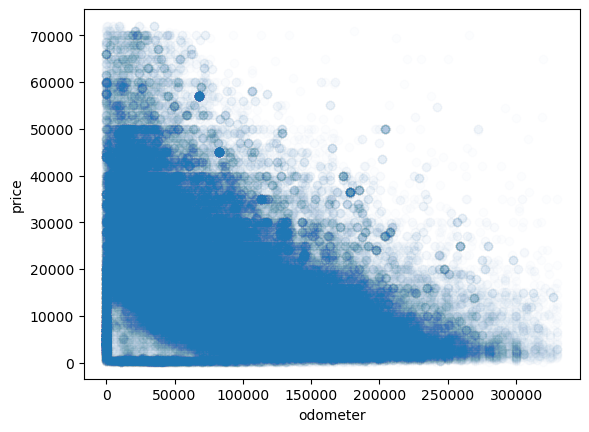

In [16]:
plt.scatter(clear_data['odometer'], clear_data['price'], alpha = 0.01) 
plt.xlabel('odometer')
plt.ylabel('price')
pass

Теперь диаграмма рассеивания выглядит лучше, мы видим линейную зависимость уменьшения цены, при увеличении пробега автомобиля, но данных довольно много из-за чего сложно понять где большее или меньшее скопление точек, отрисуем более наглядный вариант диаграммы с меньшим числом объектов

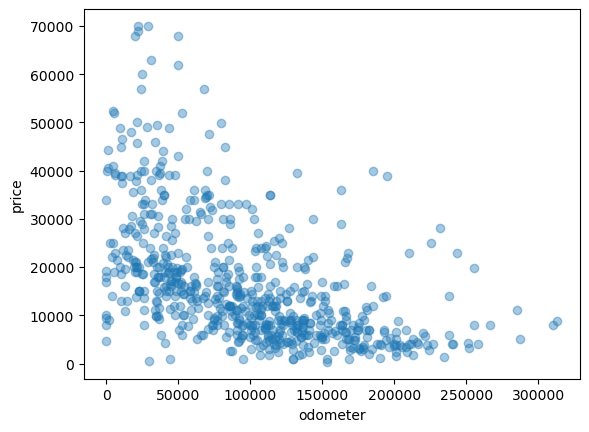

In [17]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_data.shape[0]), size=1000, replace=False)

plt.scatter(clear_data.iloc[random_subset]['odometer'], clear_data.iloc[random_subset]['price'], alpha=0.4)
plt.xlabel('odometer')
plt.ylabel('price')
pass

##### Визуализация данных

Теперь, когда мы очистили данные, попробуем визуализировать зависимость признака по которому мы собираемся классифицировать данные, от различных других признаков
За состояние автомобиля будет отвечать цвет, за год выпуска - размер, а так же оставим для осей ординат и абцисс - стоимость и пробег соотвественно

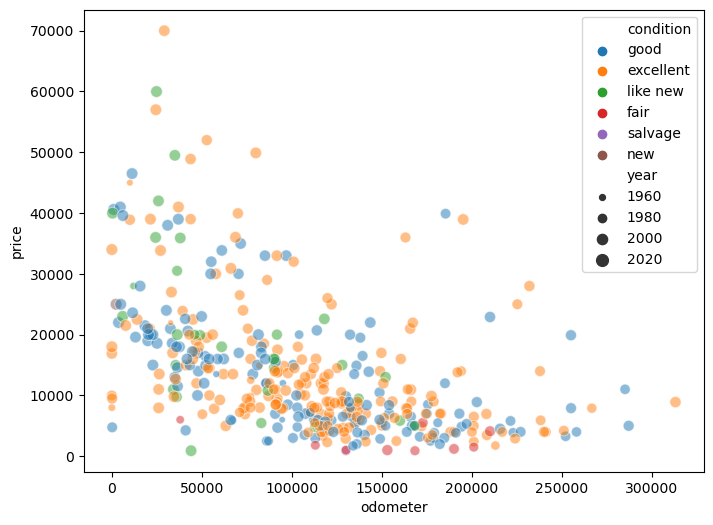

In [18]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_data.shape[0]), size=1000, replace=False)
plt.figure(figsize = (8, 6))
sns.scatterplot(x='odometer', y='price', size='year', hue='condition', data=clear_data.iloc[random_subset], alpha=0.5)
pass

* Наблюдается ожидаемая корреляция между пробегом и стоимостью автомобия

* Так же видим что машины состояния `fair` - удовлетворительно и `salvage` - неудовлетворительно, находятся по стоимости в районе менее `10'000$`, и наоборот самые дорогие машины, чаще всего в состоянии `excelent` и `like new`

* Машин 1950г и ранее - на диаграмме почти нет

* Почти все машины из класса `like new` - имеют пробег не более `150'000км` -  `200'000км`

Построим все возможные диаграммы рассеивания для каждой пары переменных, на небольшой выборке:

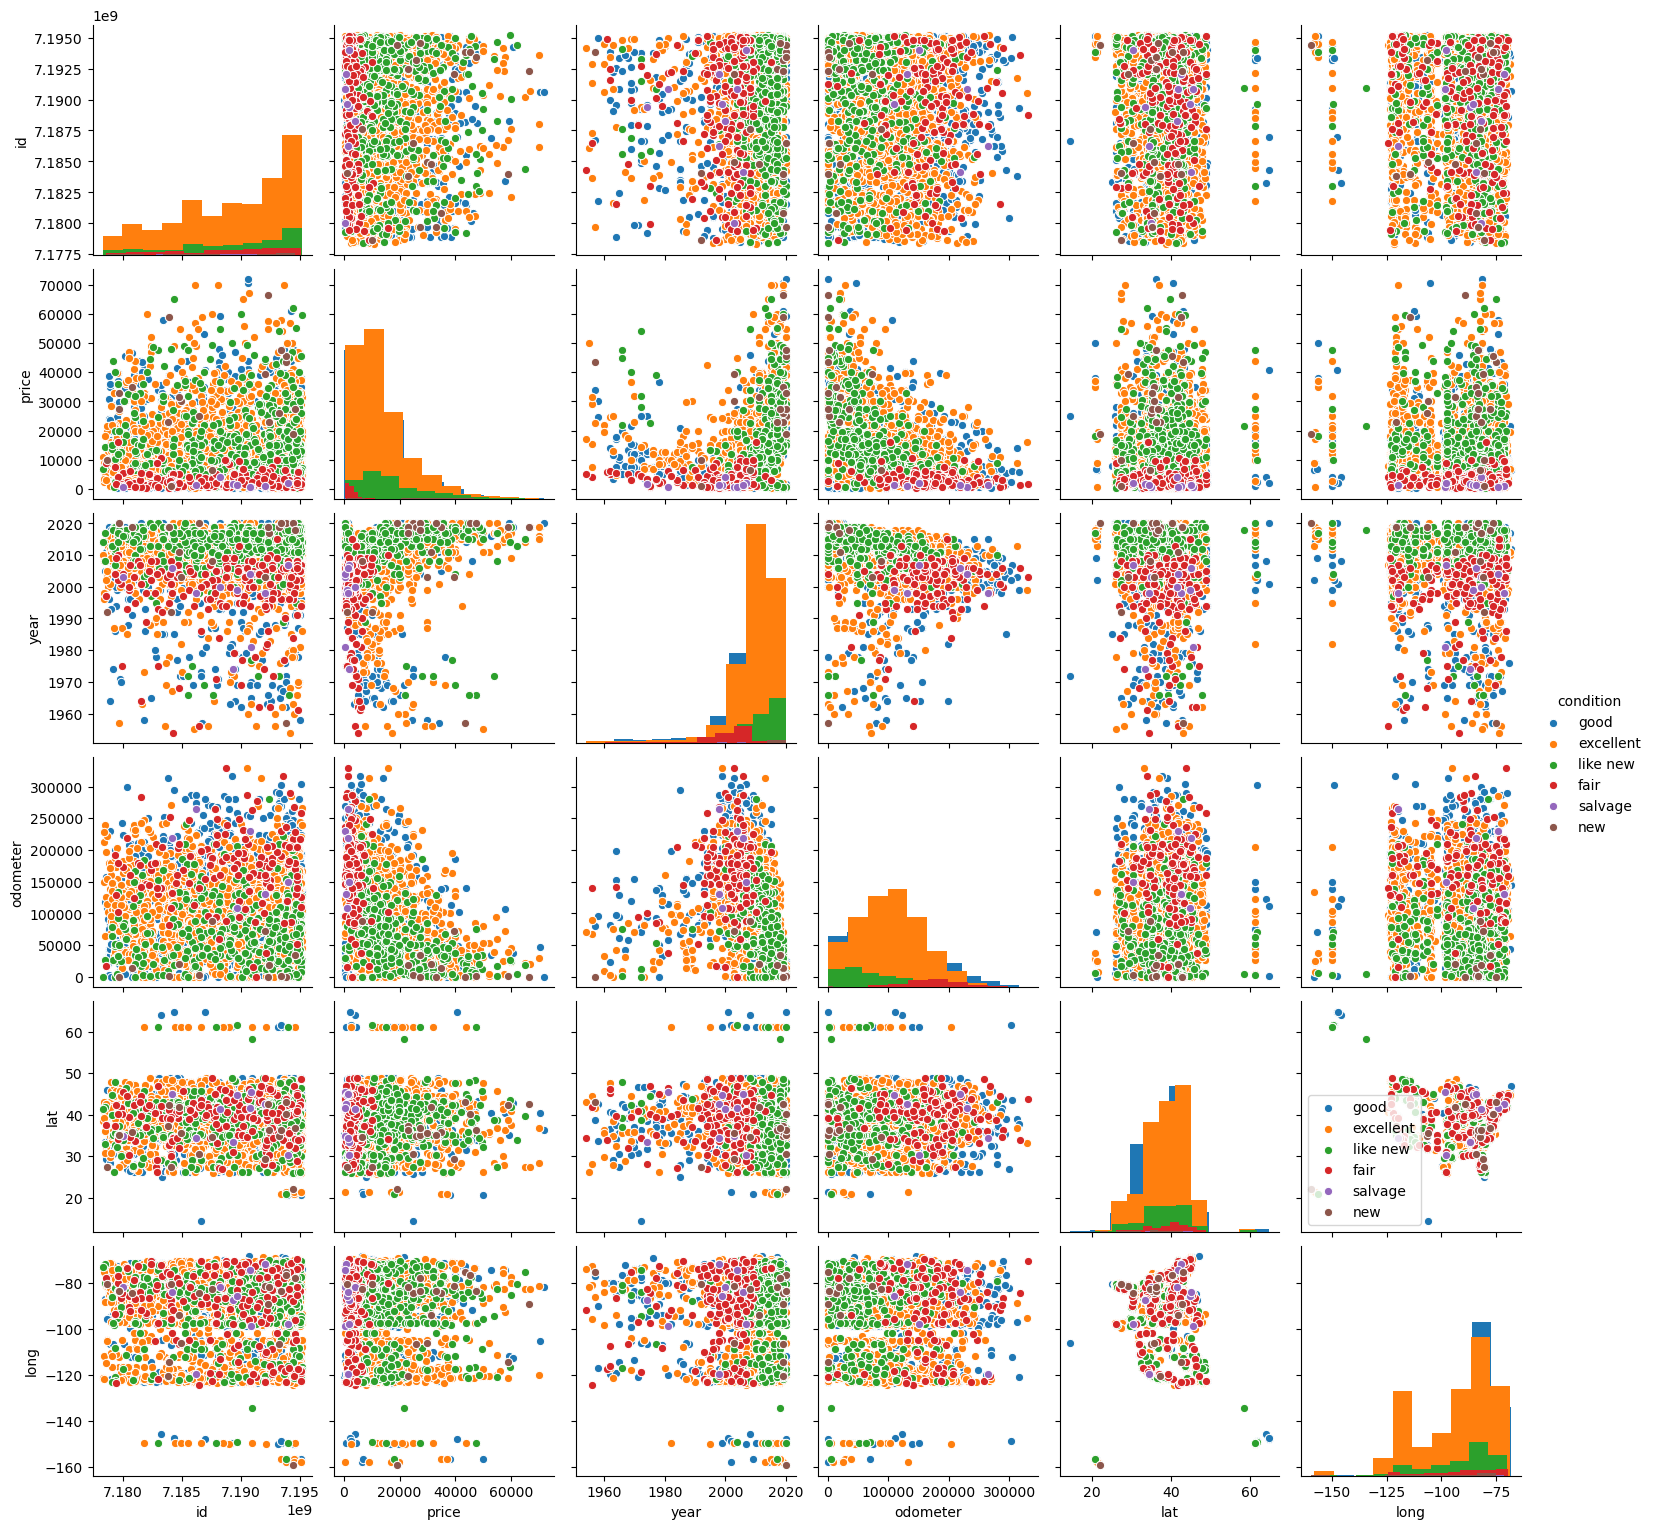

In [19]:
np.random.seed(73)
random_subset = np.random.choice(np.arange(clear_data.shape[0]), size=10000, replace=False)
sns.pairplot(clear_data.iloc[random_subset], hue='condition', diag_kind='hist')
plt.legend()
pass

Из диаграмм видно, что есть зависимости:
* цена/пробег
* цена/год
* пробег/год
* ширина/долгота

Так же можно посмотреть гистограммы для наших 3-х основных 

количественных признаков - стоимости, года и пробега

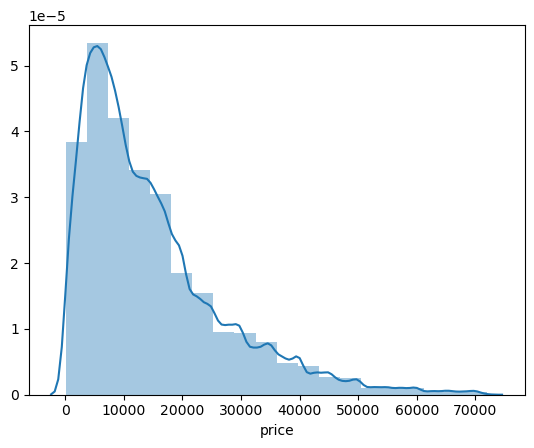

In [20]:
sns.distplot(clear_data['price'], bins = 20)
pass

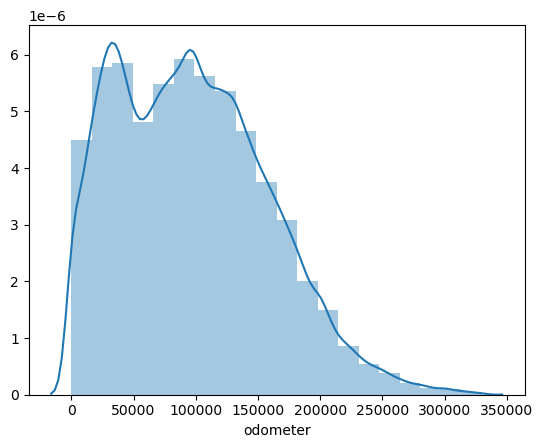

In [21]:
sns.distplot(clear_data['odometer'], bins = 20)
pass

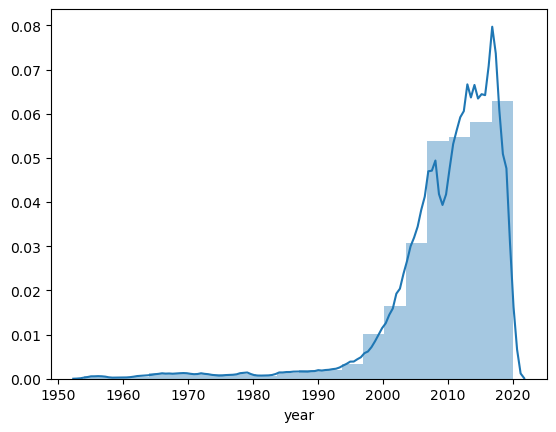

In [22]:
sns.distplot(clear_data['year'], bins = 20)
pass

##### Количественные признаки

Для более полного анализа данных, построим кореляционную матрицу и оценим степень зависимости количественных признаков друг от друга

In [23]:
corr_mat = clear_data.corr()
corr_mat

,id,price,year,odometer,lat,long
id,1.000000,-0.026177,0.007396,-0.006891,-0.071366,-0.048557
price,-0.026177,1.000000,0.360603,-0.511586,0.017023,-0.142874
year,0.007396,0.360603,1.000000,-0.420085,-0.004982,-0.057464
odometer,-0.006891,-0.511586,-0.420085,1.000000,0.007362,0.092748
lat,-0.071366,0.017023,-0.004982,0.007362,1.000000,-0.207435
long,-0.048557,-0.142874,-0.057464,0.092748,-0.207435,1.000000


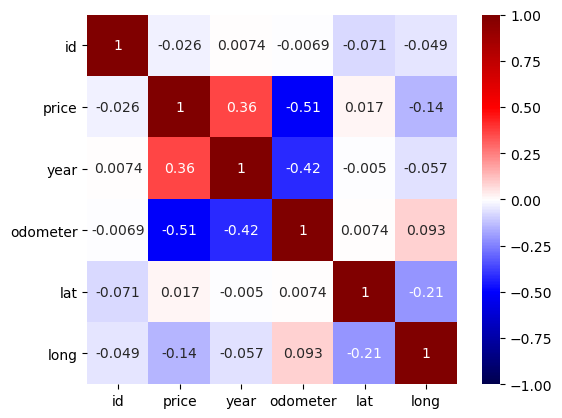

In [24]:
sns.heatmap(corr_mat, square=True, cmap='seismic', annot = True, vmin=-1, vmax=1, center= 0)
pass

In [25]:
corr_mat.where(np.triu(corr_mat > 0.2, k=1) | np.triu(corr_mat < -0.2, k=1)).stack().sort_values(ascending=False)

price  year        0.360603
lat    long       -0.207435
year   odometer   -0.420085
price  odometer   -0.511586
dtype: float64

Корреляция наблюдается у 4-х пар признаков:

| признак 1 | признак 2 | степень корреляции |
| ----- | ---- | -------------- |
| price | year |       0.360603 |
| lat   | long |      -0.207435 |
| year  | odometer |  -0.420085 |
| price | odometer |  -0.511586 |

Больше всего коррелируют цена и пробег, но значение корреляции все равно не очень большое


##### Номинальные признаки

Рассмотрим балансы внутри классов данных:

In [26]:
clear_data['region'].value_counts() 

columbus                  2988
rochester                 2916
anchorage / mat-su        2907
omaha / council bluffs    2875
denver                    2873
                          ... 
kansas city                 15
meridian                    15
west virginia (old)         12
st louis                     5
fort smith, AR               1
Name: region, Length: 404, dtype: int64

In [27]:
clear_data['manufacturer'].value_counts() 

ford               52710
chevrolet          41834
toyota             23688
honda              17207
nissan             15702
jeep               12935
gmc                11604
dodge              10821
ram                10520
hyundai             7772
subaru              7589
bmw                 7092
volkswagen          6615
mercedes-benz       6205
kia                 6184
chrysler            5299
buick               4326
cadillac            4189
mazda               3604
lexus               3545
audi                2939
acura               2576
lincoln             2367
pontiac             2190
infiniti            2007
volvo               1889
mitsubishi          1757
mercury             1261
mini                1255
rover               1100
saturn              1043
jaguar               752
fiat                 495
tesla                270
alfa-romeo           126
harley-davidson      100
datsun                68
aston-martin          16
land rover            14
porche                 6


In [28]:
clear_data['model'].value_counts() 

f-150                              5305
silverado 1500                     3413
escape                             2825
camry                              2600
1500                               2559
                                   ... 
hardtop convertible                   1
gx 470 sport utility                  1
jetta 2.0l tdi                        1
Interenational                        1
f-150 xl 4wd supercrew 5.5' box       1
Name: model, Length: 24763, dtype: int64

In [29]:
clear_data['condition'].value_counts() 

excellent    77618
good         61701
like new     16357
fair          6403
new            849
salvage        475
Name: condition, dtype: int64

In [30]:
clear_data['cylinders'].value_counts() 

4 cylinders     64652
6 cylinders     64408
8 cylinders     48183
5 cylinders      1545
10 cylinders      718
other             652
3 cylinders       384
12 cylinders      125
Name: cylinders, dtype: int64

In [31]:
clear_data['fuel'].value_counts() 

gas         259357
diesel       20287
other         8862
hybrid        3426
electric       894
Name: fuel, dtype: int64

In [32]:
clear_data['title_status'].value_counts() 

clean         281801
rebuilt         5857
salvage         3162
lien            1919
missing          539
parts only       158
Name: title_status, dtype: int64

In [33]:
clear_data['transmission'].value_counts() 

automatic    262474
manual        21020
other         10345
Name: transmission, dtype: int64

In [34]:
clear_data['drive'].value_counts() 

4wd    89170
fwd    81537
rwd    37488
Name: drive, dtype: int64

In [35]:
clear_data['size'].value_counts()

full-size      46916
mid-size       28045
compact        14756
sub-compact     2361
Name: size, dtype: int64

In [36]:
clear_data['type'].value_counts()

sedan          58084
SUV            56115
truck          22637
pickup         22166
coupe          11525
other          10704
hatchback       8769
wagon           7552
van             6559
convertible     5358
mini-van        4898
offroad          495
bus              356
Name: type, dtype: int64

In [37]:
clear_data['paint_color'].value_counts()

white     51292
black     39660
silver    30029
blue      21148
red       20405
grey      20018
custom     5793
green      5474
brown      4286
yellow     1594
orange     1355
purple      606
Name: paint_color, dtype: int64

In [38]:
clear_data['state'].value_counts()

ca    40304
fl    25142
tx    20769
ny    16356
oh    15437
mi    15289
or    14049
wa    12591
wi    12087
nc    12023
pa    11323
co    11293
tn     9910
nj     9697
il     9103
id     8864
va     8609
ia     8384
mn     8382
az     7684
mt     7173
ma     6956
in     5678
ks     5489
ok     5373
sc     5365
ga     4999
al     4850
ct     4778
ky     4377
md     4074
mo     4002
ak     3890
nm     3793
ar     3405
nv     2923
nh     2760
hi     2701
la     2575
dc     2555
me     2501
ri     2376
vt     2301
ne     2048
sd     1615
ms     1284
ut      984
de      779
wy      769
wv      593
nd      416
Name: state, dtype: int64

По частоте вхождений данных, можно назвать 3 класса - несбаласированными:
* `transmission` - тип коробки передач

| transmission  | 295445 | % |
| ---- | ---- | --- |
| automatic   | 263213 | 89 |
| manual      |  21796 | 7 |
| other       |  10436 | 4 |

* `title_status` - официальный статус в государственном реестре 

| title_status  | 295043 | % |
| ---- | ---- | --- |
| clean |        283253 | 96 |
| rebuilt |        5874 | 2 |
| salvage |        3164 | 1 |
| lien    |        1919 | 0,6 |
| missing |         659 | 0,3 |
| parts only |      174 | 0,1 |

* `fuel` - тип двигателя

| fuel  | 294428 | % |
| ---- | ---- | --- |
| gas         | 260888 | 88,6 |
| diesel      | 20316  | 6,9 |
| other       |  8902  | 3 |
| hybrid      |  3427  | 1,1 |
| electric    |   895  | 0,4 |


Так же подробнее рассмотрим состояние машин, по котрому мы будем их классифицировать

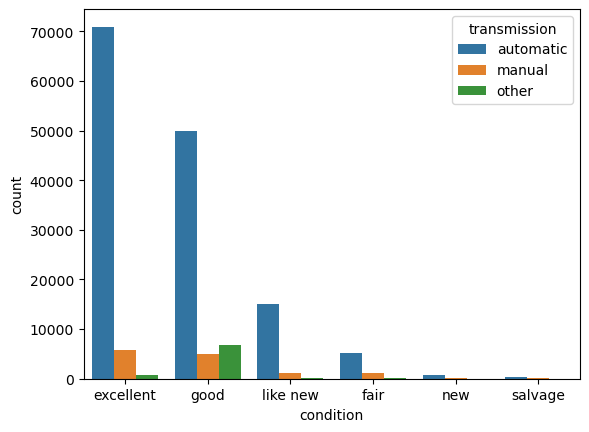

In [39]:
sns.countplot(x='condition', order=clear_data['condition'].value_counts().index, hue='transmission', data=clear_data)
pass

Видим что машины с коробками передач типа(вариатор или роботизированной) в большинстве случаев находятся в хорошем состоянии, значит это своеобразный индикатор, для более точного определения состояния машины, так же и тип двигателя имеет похожий вид гистограммы

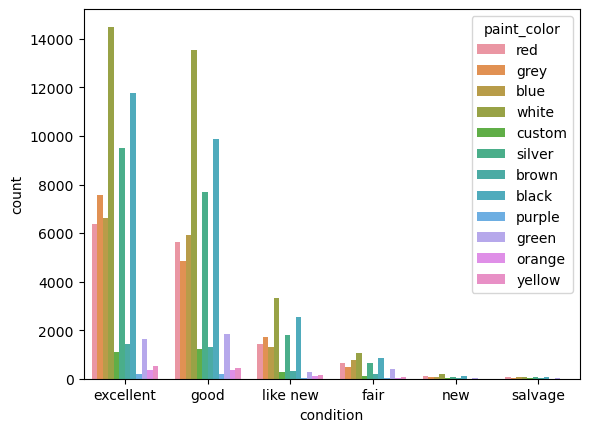

In [40]:
sns.countplot(x='condition', order=clear_data['condition'].value_counts().index, hue='paint_color', data=clear_data)
pass

а вот цвет машины почти ничего не может сказать о ее состоянии, похожая картина получается при рассмотрении состояния с признаками `type`, `size`, `drive`, `cylinders`

Также посмотрим информацию о характере распределения состояния от цены/года и пробега автомобиля

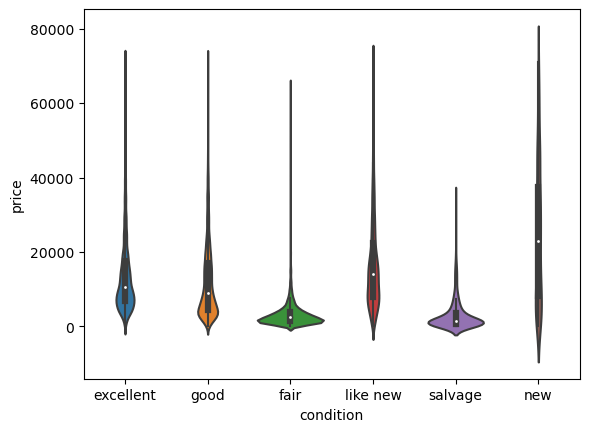

In [41]:
sns.violinplot(x="condition", y="price", data=clear_data)
pass

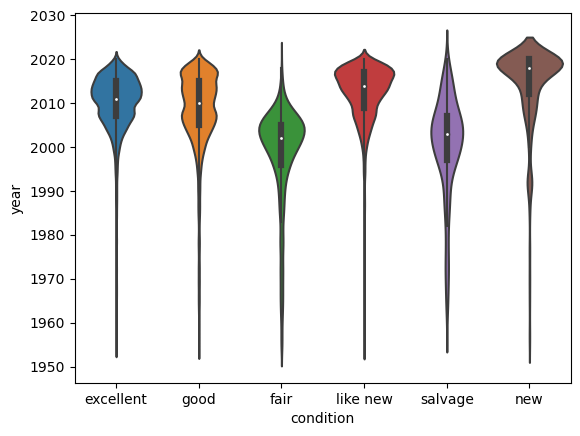

In [42]:
sns.violinplot(x="condition", y="year", data=clear_data)
pass

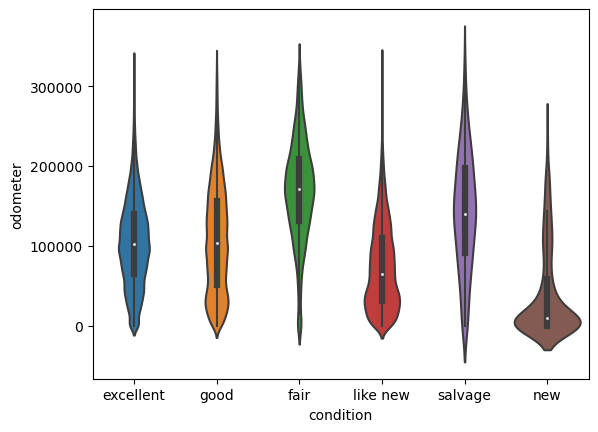

In [43]:
sns.violinplot(x="condition", y="odometer", data=clear_data)
pass

Можно отметить, что пары классов, `excellent` и `good`, `fair` и `salvage` имеют похожие распределения по некоторым параметрам, что может затруднить правильную классификацию между этими парами

## 4 Обработка пропущенных значений
***
Посмотрим на число пропущенных значений в каждом столбце

In [44]:
clear_data.shape

(380678, 24)

In [45]:
clear_data.isna().sum()  

id                   0
url                  0
region               0
region_url           0
price                0
year             86567
manufacturer     98997
model            89193
condition       217275
cylinders       200011
fuel             87852
odometer        136015
title_status     87242
transmission     86839
vin             217738
drive           172483
size            288600
type            165460
paint_color     179018
image_url        85678
description      85685
state                0
lat              87560
long             87560
dtype: int64

В нашем признаке состояния машины находится 217275 (57%) пропущенных значений, что ставит вопрос о том как правильно обработать эти значения? 

Первый вариант - оставить 43% данных с известным классом `condition` для обучения модели, и заполнить для них все пропущенные значения

Второй - Удалить все строки, в которых есть пропущенные значения

В любом случае статистическая мощность будет уменьшаться, и на данном этапе невозможно предсказать какой из методов покажет себя лучше, поэтому будем использовать 2 параллельных набора данных с 2-мя типами обработки пропущенных значений `delete_data` и `predict_data`, и посмотрим как в итоге это повлияет на ошибку при обучении модели

Так же столбцы, `url`, `region_url`, `image_url`, `description`, `vin` не имеют особого смысла для модели, и бинаризовать их для дальнейшего обучения будет сложно, поэтому удалим их на этом этапе

##### обработка номинальных признаков

In [46]:
import copy

predict_data = copy.deepcopy(clear_data)
predict_data.drop(['url','region_url','image_url','description','vin'], axis='columns', inplace=True)
predict_data.fillna(predict_data.median(axis = 0), axis=0 , inplace=True)

In [47]:
predict_data.isna().sum()  

id                   0
region               0
price                0
year                 0
manufacturer     98997
model            89193
condition       217275
cylinders       200011
fuel             87852
odometer             0
title_status     87242
transmission     86839
drive           172483
size            288600
type            165460
paint_color     179018
state                0
lat                  0
long                 0
dtype: int64

##### обработка категориальных признаков

In [48]:
predict_data['manufacturer'].fillna(predict_data['manufacturer'].mode().iloc[0], inplace=True)
predict_data['model'].fillna(predict_data['model'].mode().iloc[0], inplace=True)
predict_data['cylinders'].fillna(predict_data['cylinders'].mode().iloc[0], inplace=True)
predict_data['fuel'].fillna(predict_data['fuel'].mode().iloc[0], inplace=True)
predict_data['title_status'].fillna(predict_data['title_status'].mode().iloc[0], inplace=True)
predict_data['transmission'].fillna(predict_data['transmission'].mode().iloc[0], inplace=True)
predict_data['drive'].fillna(predict_data['drive'].mode().iloc[0], inplace=True)
predict_data['size'].fillna(predict_data['size'].mode().iloc[0], inplace=True)
predict_data['type'].fillna(predict_data['type'].mode().iloc[0], inplace=True)
predict_data['paint_color'].fillna(predict_data['paint_color'].mode().iloc[0], inplace=True)

In [49]:
predict_data.isna().sum()  

id                   0
region               0
price                0
year                 0
manufacturer         0
model                0
condition       217275
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size                 0
type                 0
paint_color          0
state                0
lat                  0
long                 0
dtype: int64

И последним шагом, оставляем в наших данных только те, значение класса для которых нам известно

In [50]:
predict_data.dropna(inplace=True)

In [51]:
predict_data.shape

(163403, 19)

##### Исключение пропущенных значений
Соберем второй датасет, удаляя все объекты содержащие пропуски

In [52]:
delete_data = copy.deepcopy(clear_data)
delete_data.drop(['url','region_url','image_url','description','vin'], axis='columns', inplace=True)

In [53]:
delete_data.dropna(inplace=True)

In [54]:
delete_data.shape

(57796, 19)

## 5 Обработка категореальных признаков
***
Для алгоритмов нам потребуется провести бинаризацию данных для всех категориальных признаков, особое внимание нужно обратить на столбец - `model` и `region` содеращие большое количество уникальных признаков, и имеющие написание в формате предложения, а не одного слова. 

In [55]:
delete_data['model'].value_counts()

f-150                     1045
silverado 1500             906
1500                       526
camry                      447
accord                     439
                          ... 
3500 slt 4x4                 1
envoy xl 4.2l 4x4            1
rx 400h awd hybrid           1
sparl ls                     1
expedition limited 4wd       1
Name: model, Length: 8097, dtype: int64

In [56]:
predict_data['model'].value_counts()

f-150                               3735
silverado 1500                      1822
camry                               1259
accord                              1201
1500                                1153
                                    ... 
1500 shortbed pickup                   1
clk430 cabriolet                       1
t350 ext drw                           1
MASERATI GRANTURISMO CONVERTIBLE       1
model a (kit car, pinto)               1
Name: model, Length: 17875, dtype: int64

In [57]:
count_cloud = set()

for val in predict_data['model']:      
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
        count_cloud.add(tokens[i])

model_dummies = pd.DataFrame(count_cloud).T
model_dummies.rename(columns=model_dummies.iloc[0], inplace=True)
model_dummies.iloc[0] = 0

"""
import re
def substr(word, words):
    list=(re.findall(r"[\w']+", words))
    if word in list:
        return 1
    else:
        return 0

for i in range(predict_data['model'].size):
    for j in range(len(count_cloud)):
        model_dummies.at[i,model_dummies.columns[j]] = substr(model_dummies.columns[j],predict_data['model'].iloc[i])
"""

model_dummies

,hill,fj,2000ford,th!nk,honda/accord,56,"silverado,",1300,rollx,elentra,...,s83,suv's,scatpack,intern,deisel,lounge,sedan,only,madza,value
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Данная функция собирает облако уникальных слов содержащихся в параметре, и создает для нее pandas dataframe с фиктивными dummy-признаками, но к сожалению выходная размерность облака слов - `6183`, а число строк `predict_data - 164421`, очень велики, из-за чего не удается бинаризировать признак `model`, а так же и признак `region` на текущей вычислительной мощности

В данной работе, эти признаки так же придется убрать из рассмотрения.

In [58]:
delete_data.drop(['model','region'], axis='columns', inplace=True)

In [59]:
predict_data.drop(['model','region'], axis='columns', inplace=True)

А вот с оставшимися категориальными признаками, проводим бинаризацию

In [60]:
def dummies(name, data):
    return_data = data
    return_data[name] = return_data[name].astype('category')
    p_dummies = pd.get_dummies(return_data[name])   
    return_data = pd.concat([return_data, p_dummies], axis=1)
    return return_data

predict_data = dummies('state', predict_data)    
predict_data = dummies('manufacturer', predict_data)
predict_data = dummies('cylinders', predict_data)
predict_data = dummies('fuel', predict_data)
predict_data = dummies('title_status', predict_data)
predict_data = dummies('transmission', predict_data)
predict_data = dummies('drive', predict_data)
predict_data = dummies('size', predict_data)
predict_data = dummies('type', predict_data)
predict_data = dummies('paint_color', predict_data)

predict_data.drop(['state','manufacturer','cylinders','fuel','title_status',
                   'transmission','drive','size','type',
                   'paint_color'], axis='columns', inplace=True)


In [61]:
predict_data.describe()

,id,price,year,odometer,lat,long,ak,al,ar,az,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
count,1.634030e+05,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,...,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000
mean,7.189018e+09,13075.117427,2008.747857,102923.495077,38.469918,-91.642897,0.007289,0.013458,0.008874,0.014975,...,0.020165,0.016750,0.025501,0.090206,0.005716,0.002962,0.087244,0.121314,0.378555,0.007142
std,4.749733e+06,10724.231460,9.356585,57923.899047,5.462379,16.765805,0.085063,0.115224,0.093782,0.121454,...,0.140564,0.128334,0.157643,0.286478,0.075388,0.054344,0.282194,0.326492,0.485028,0.084207
min,7.178302e+09,147.000000,1954.000000,0.000000,-56.527000,-161.394000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.185460e+09,5495.000000,2006.000000,63569.500000,35.028000,-97.942700,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.189960e+09,9995.000000,2011.000000,93500.000000,39.283900,-85.978100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.193263e+09,17500.000000,2015.000000,138503.000000,42.234700,-80.183100,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.195225e+09,71995.000000,2020.000000,330000.000000,80.383400,94.163200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
predict_data.shape

(163403, 154)

In [63]:
delete_data = dummies('state', delete_data)    
delete_data = dummies('manufacturer', delete_data)
delete_data = dummies('cylinders', delete_data)
delete_data = dummies('fuel', delete_data)
delete_data = dummies('title_status', delete_data)
delete_data = dummies('transmission', delete_data)
delete_data = dummies('drive', delete_data)
delete_data = dummies('size', delete_data)
delete_data = dummies('type', delete_data)
delete_data = dummies('paint_color', delete_data)

delete_data.drop(['state','manufacturer','cylinders','fuel','title_status',
                   'transmission','drive','size','type',
                   'paint_color'], axis='columns', inplace=True)

In [64]:
delete_data.shape

(57796, 152)

## 6 Нормализация и деление на выборки
***
Так же нормализуем количественные данные, что бы большие величины, не внесли больше вклада в веса сети, чем следовало бы


Для каждого набора данных возьем пропорциональное количество данных - 

75%/25% для обучения и тестовых, что бы точнее сравнить результат 

In [65]:
normalize1 = pd.concat([predict_data.iloc[:, 0],
                        predict_data['price'], 
                        predict_data['year'],
                        predict_data['odometer'],
                        predict_data['lat'],
                        predict_data['long']], axis=1)
normalize1

,id,price,year,odometer,lat,long
0,7184791621,6995,2000.0,167783.0,46.8433,-92.2550
1,7184773187,8750,2013.0,90821.0,46.9074,-92.4638
2,7193375964,10900,2013.0,92800.0,41.1770,-73.1336
3,7195108810,12500,2003.0,93500.0,35.1868,-106.6650
4,7184712241,16995,2007.0,254217.0,45.6836,-92.9648
...,...,...,...,...,...,...
423851,7195116656,4800,2002.0,58000.0,34.8543,-106.6960
423852,7184919761,1600,2006.0,159980.0,46.8348,-92.0742
423853,7184844576,9000,2003.0,160000.0,46.9369,-91.9325
423854,7184805809,700,1994.0,212000.0,46.7715,-92.1279


In [66]:
normalize2 = pd.concat([delete_data.iloc[:, 0],
                        delete_data['price'], 
                        delete_data['year'],
                        delete_data['odometer'],
                        delete_data['lat'],
                        delete_data['long']], axis=1)
normalize2

,id,price,year,odometer,lat,long
4,7184712241,16995,2007.0,254217.0,45.6836,-92.9648
5,7184711787,13995,2012.0,188406.0,45.6836,-92.9648
6,7184710887,7995,2010.0,108124.0,45.6836,-92.9648
7,7184710023,8995,2011.0,178054.0,45.6836,-92.9648
8,7184709156,10995,2014.0,170259.0,45.6836,-92.9648
...,...,...,...,...,...,...
423845,7195062876,1600,2004.0,292255.0,42.3496,-73.5873
423849,7193376881,9885,2012.0,82000.0,41.3323,-72.7809
423850,7195116716,750,2002.0,40000.0,35.1374,-106.6380
423851,7195116656,4800,2002.0,58000.0,34.8543,-106.6960


После выделения количественных признаков, нормализируем их

In [67]:
n1 = (normalize1 - normalize1.mean(axis = 0))/normalize1.std(axis = 0)
n2 = (normalize2 - normalize2.mean(axis = 0))/normalize2.std(axis = 0)

n1.describe()

,id,price,year,odometer,lat,long
count,1.634030e+05,1.634030e+05,1.634030e+05,1.634030e+05,1.634030e+05,1.634030e+05
mean,6.001145e-14,-3.060484e-16,7.493672e-15,-1.369094e-15,6.426956e-13,7.084023e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.256213e+00,-1.205505e+00,-5.851265e+00,-1.776874e+00,-1.739112e+01,-4.160319e+00
25%,-7.491204e-01,-7.068215e-01,-2.936816e-01,-6.794086e-01,-6.301134e-01,-3.757531e-01
50%,1.982675e-01,-2.872110e-01,2.407014e-01,-1.626875e-01,1.490159e-01,3.378780e-01
75%,8.937148e-01,4.126060e-01,6.682079e-01,6.142457e-01,6.892201e-01,6.835220e-01
max,1.306816e+00,5.494089e+00,1.202591e+00,3.920256e+00,7.673118e+00,1.108244e+01


Готовим выходной вектор Y и объединяем наши данные:

In [68]:
predict_data.drop(predict_data.columns[[0]], axis='columns', inplace=True)
predict_data.drop(['price'], axis='columns', inplace=True)
predict_data.drop(['year'], axis='columns', inplace=True)
predict_data.drop(['odometer'], axis='columns', inplace=True)
predict_data.drop(['lat'], axis='columns', inplace=True)
predict_data.drop(['long'], axis='columns', inplace=True)

In [69]:
delete_data.drop(delete_data.columns[[0]], axis='columns', inplace=True)
delete_data.drop(['price'], axis='columns', inplace=True)
delete_data.drop(['year'], axis='columns', inplace=True)
delete_data.drop(['odometer'], axis='columns', inplace=True)
delete_data.drop(['lat'], axis='columns', inplace=True)
delete_data.drop(['long'], axis='columns', inplace=True)

In [70]:
y1 = predict_data['condition']
y2 = delete_data['condition']

predict_data.drop(['condition'], axis='columns', inplace=True)
delete_data.drop(['condition'], axis='columns', inplace=True)

In [71]:
x1 = pd.concat([n1, predict_data], axis=1)
x2 = pd.concat([n2, delete_data], axis=1)

In [72]:
x1.describe()

,id,price,year,odometer,lat,long,ak,al,ar,az,...,brown,custom,green,grey,orange,purple,red,silver,white,yellow
count,1.634030e+05,1.634030e+05,1.634030e+05,1.634030e+05,1.634030e+05,1.634030e+05,163403.000000,163403.000000,163403.000000,163403.000000,...,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000,163403.000000
mean,6.001145e-14,-3.060484e-16,7.493672e-15,-1.369094e-15,6.426956e-13,7.084023e-13,0.007289,0.013458,0.008874,0.014975,...,0.020165,0.016750,0.025501,0.090206,0.005716,0.002962,0.087244,0.121314,0.378555,0.007142
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.085063,0.115224,0.093782,0.121454,...,0.140564,0.128334,0.157643,0.286478,0.075388,0.054344,0.282194,0.326492,0.485028,0.084207
min,-2.256213e+00,-1.205505e+00,-5.851265e+00,-1.776874e+00,-1.739112e+01,-4.160319e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.491204e-01,-7.068215e-01,-2.936816e-01,-6.794086e-01,-6.301134e-01,-3.757531e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.982675e-01,-2.872110e-01,2.407014e-01,-1.626875e-01,1.490159e-01,3.378780e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.937148e-01,4.126060e-01,6.682079e-01,6.142457e-01,6.892201e-01,6.835220e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.306816e+00,5.494089e+00,1.202591e+00,3.920256e+00,7.673118e+00,1.108244e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
x1 = x1.to_numpy()
x2 = x2.to_numpy()

In [74]:
y1 = y1.replace(['excellent','new','like new','good','fair','salvage'], [6, 5, 4, 3, 2, 1])
y2 = y2.replace(['excellent','new','like new','good','fair','salvage'], [6, 5, 4, 3, 2, 1])

In [75]:
y1

0         6
1         6
2         3
3         3
4         3
         ..
423851    3
423852    2
423853    6
423854    2
423855    6
Name: condition, Length: 163403, dtype: int64

In [76]:
y1 = y1.to_numpy()
y2 = y2.to_numpy()

In [77]:
y2

array([3, 3, 3, ..., 1, 3, 6])

Разбиваем данные на обучающие выборки:

In [78]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 73)

N1_train, _ = X1_train.shape 
N1_test,  _ = X1_test.shape 

N1_train, N1_test

(122552, 40851)

In [79]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.25, random_state = 73)

N2_train, _ = X2_train.shape 
N2_test,  _ = X2_test.shape 

N2_train, N2_test

(43347, 14449)

## 7. Запуск классификаторов


##### KNeighborsClassifier
Для построения модели классификации используем классический метод K ближних соседей на первом наборе  `predict_data`

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X1_train, y1_train)

y1_train_predict = knn.predict(X1_train)
err_train_1 = np.mean(y1_train != y1_train_predict)
print(err_train_1)

0.29610287877798813


Смотрим ошибку на тестовых данных

In [84]:
y1_test_predict = knn.predict(X1_test)
err_test_1 = np.mean(y1_test != y1_test_predict)
print(err_test_1)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y1_test, y1_test_predict, labels=[1, 2, 3, 4, 5, 6]))

0.36160681501064845
[[    0     9    79     1     0    42]
 [    0    91   962    11     1   464]
 [    0   163 10014   216     3  4989]
 [    0     7   771  1021     1  2324]
 [    0     0    40    27    41    99]
 [    0    35  3915   606     7 14912]]


Повторяем процедуру для второго набора данных `delete_data`

In [82]:
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X2_train, y2_train)

y2_train_predict = knn2.predict(X2_train)
err_train_2 = np.mean(y2_train != y2_train_predict)
print(err_train_2)

0.33061111495605233


In [83]:
y2_test_predict = knn2.predict(X2_test)
err_test_2 = np.mean(y2_test != y2_test_predict)
print(err_test_2)

0.40909405495189977


Если сравнить результаты, то модель обученная на более объемной выборке - `predict_data` показывает себя при обучении и на тестах лучше чем `delete_data`, 

| Название | Объем выборки N | ошибка на обучении | ошибка на тестах |
| --- | --- | --- | --- |
| predict_data | 122552 | 0.2961 | 0.3616 |
| delete_data | 43347 | 0.3306 | 0.4090 |

Ошибка довольно большая, попробуем подстроить параметры метода, для получения лучшего результата, для обеих моделей, (вторую модель пока не будем отбрасывать, не смотря на то что она показала себя хуже т.к. возможно ошибка на `delete_data`, вызвана слишком большим значением количества ближайших соседей = 10, и модель просто недообучается на таком малом количестве объектов выборки)

In [94]:
for i in range(9,1,-1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X1_train, y1_train)

    y1_train_predict = knn.predict(X1_train)
    err_train = np.mean(y1_train != y1_train_predict)
    
    y1_test_predict = knn.predict(X1_test)
    err_test = np.mean(y1_test != y1_test_predict)
    
    print(i, err_train, err_test)

9 0.29044813630132515 0.36256150400235
8 0.28209249951041193 0.36292869207608136
7 0.27382662053658857 0.360309417150131
6 0.26293328546249756 0.3653766125676238
5 0.24831092107839936 0.363369317764559
4 0.22807461322540637 0.36975839024748475
3 0.19927867354265943 0.36811828351815135
2 0.16289411841504015 0.40234021198991454


Построим график для `predict_data` 

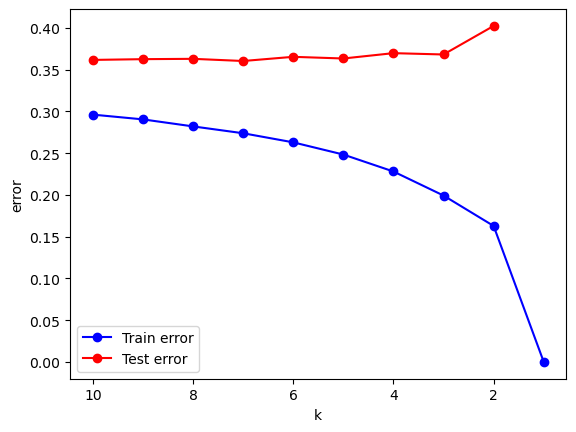

In [95]:
plt.plot(range(10,0,-1), [0.2961, 0.2904, 0.2820, 0.2738, 0.2629, 0.2483, 0.2280, 0.1992, 0.1628, 0.0], '-ob', label="Train error")
plt.plot(range(10,1,-1), [0.3616, 0.3625, 0.3629, 0.3603, 0.3653, 0.3633, 0.3697, 0.3681, 0.4023], '-or', label="Test error")
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('k')
plt.ylabel('error')
plt.show()

Проделаем аналогичные операции для `delete_data`

In [90]:
for i in range(9,1,-1):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X2_train, y2_train)

    y2_train_predict = knn2.predict(X2_train)
    err_train = np.mean(y2_train != y2_train_predict)
    
    y2_test_predict = knn2.predict(X2_test)
    err_test = np.mean(y2_test != y2_test_predict)
    
    print(i, err_train, err_test) 

9 0.32345952430387337 0.40895563706830923
8 0.3153851477610907 0.4110319053221676
7 0.3054882690843657 0.40584123468752165
6 0.2924308487323229 0.41511523288808916
5 0.2771587422428311 0.413108173576026
4 0.25743419383117633 0.42099799294068796
3 0.2236371605878146 0.4178835905599003
2 0.18547996401135028 0.4515191362724064


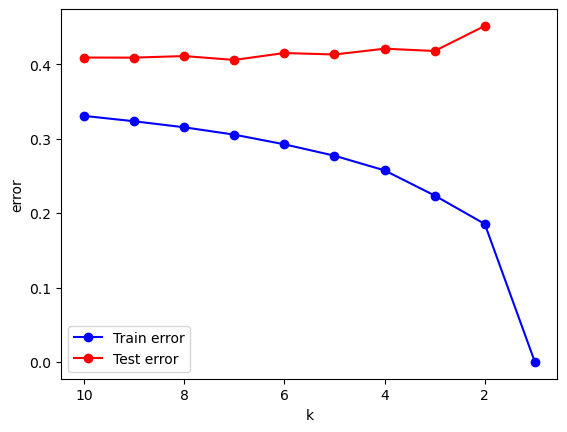

In [92]:
plt.plot(range(10,0,-1), [0.3306, 0.3234, 0.3153, 0.3054, 0.2924, 0.2771, 0.2574, 0.2236, 0.1854, 0.0], '-ob', label="Train error")
plt.plot(range(10,1,-1), [0.4090, 0.4089, 0.4110, 0.4058, 0.4151, 0.4131, 0.4209, 0.4178, 0.4515, ], '-or', label="Test error")
plt.gca().invert_xaxis()
plt.legend()
plt.xlabel('k')
plt.ylabel('error')
plt.show()

Ошибки при использовании метода ближайших к соседей, получились довольно большими, попробуем рассмотреть еще какой нибудь метод для классификации задач

##### Random forest

In [86]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X1_train, y1_train)

y1_train_predict = rf.predict(X1_train)
y1_test_predict = rf.predict(X1_test)

err_train1 = np.mean(y1_train != rf.predict(X1_train))
err_test1  = np.mean(y1_test  != rf.predict(X1_test))

print(err_train1, err_test1)

0.0 0.24841497148172628


In [87]:
print(confusion_matrix(y1_test, y1_test_predict, labels=[1, 2, 3, 4, 5, 6]))

[[   11    44    63     0     0    13]
 [    0   312  1091     0     0   126]
 [    0   130 11508    32     0  3715]
 [    0     3   315  1572     4  2230]
 [    0     0    25    20    74    88]
 [    1    10  2088   147     3 17226]]


In [93]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X2_train, y2_train)

y2_train_predict = rf.predict(X2_train)
y2_test_predict = rf.predict(X2_test)

err_train2 = np.mean(y2_train != rf.predict(X2_train))
err_test2  = np.mean(y2_test  != rf.predict(X2_test))

print(err_train2, err_test2)

0.0 0.29746003183611325


## 8. Ошибки и выводы

1. Метод обработки данных, с заполнением пропущенных значений, оказался лучше чем метод удаления любых пропущенных значений, увеличив точность модели на 4% 
2. Наименьшая ошибка для метода к-ближайших соседей:

| Название | Объем выборки N | ошибка на обучении | ошибка на тестах | K |
| --- | --- | --- | --- | --- |
| predict_data | 122552 | 0.2738 | 0.3603 | 7 |

3. Random forest - отработал лучше чем метод к-ближайших соседей для этой задачи

| Название | Объем выборки N | ошибка на обучении | ошибка на тестах | estimators |
| --- | --- | --- | --- | --- |
| predict_data | 122552 | 0.0 | 0.2484 | 1000 |

4.  Улучшить точность можно:

    - Добавив в данные столбцы `model` и `region`, выпавшие на этапе бинаризации, ввиду большой вычислительной нагрузки на систему
    - Собрав более полный датасет с меньшим числом пропущенных значений, так как из `380678` объектов, только `163403(43%)` имели заполненное поле `condition` 
    - Cведя эту задачу, например к задаче классификации с 2-мя классами `купить машину` или `не купить` - где к первому классу будут отнесены машины отличного и хорошего качества, а во второй класс объединятся машины состояния `salvage` и `fair`
    - Проверить решения другими методами классификации

## 9. PCA

In [89]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(x1)
print("Главные компоненты (по строкам):")
print(pca_model.components_)
print("Дисперсии по главным компонентам:")
print(pca_model.explained_variance_)
print("Среднеквадратические отклонения:")
print(np.sqrt(pca_model.explained_variance_))

Главные компоненты (по строкам):
[[-6.14494599e-03  6.18008972e-01  5.00804773e-01 -5.83034402e-01
  -8.85691474e-02 -3.50068536e-02  1.42874513e-04  1.34684489e-03
   5.45387573e-04  8.90754173e-04  1.85510121e-02 -7.98309139e-04
  -1.25234316e-03 -1.54666623e-03 -5.43726604e-04  1.05785169e-02
  -1.05466531e-03  1.96460018e-03 -1.89492659e-03 -2.22013505e-03
   1.14215094e-03 -1.85426445e-03  6.33916505e-04 -1.89466688e-04
  -1.39765917e-03 -1.02603818e-03 -9.69537021e-04  2.26761734e-03
  -6.62152540e-03 -1.53679202e-03 -7.54632762e-04  7.94658197e-04
   2.43280921e-03 -1.75546014e-04 -5.09334260e-04 -6.60794777e-04
  -4.90870936e-03 -3.82529460e-04  1.27676693e-04  6.20322497e-04
  -7.14199190e-03  9.85888339e-04 -5.40654304e-03 -5.48168049e-03
  -4.32609040e-05 -5.27733668e-05 -2.41906241e-04  3.09141118e-03
   4.73472968e-03 -8.90091970e-05 -3.54731129e-03 -2.54684944e-05
  -7.12565689e-04 -1.36535209e-03 -3.94292826e-05  5.99894718e-04
  -1.95133336e-03  1.87381942e-05  1.459267

In [90]:
pca = pca_model.transform(x1)
print(pca.shape)
print(pca)

(163403, 2)
[[-1.62698233 -1.27764857]
 [-0.07985973 -0.94365455]
 [ 0.07317586  0.67712576]
 ...
 [-1.25062381 -1.31802589]
 [-2.84086187 -1.1247509 ]
 [-1.80351267 -1.1657128 ]]


In [ ]:
plt.figure(figsize = (15,15))
colors = ['red' if yy == 1 
          else 'orange' if yy == 2 
          else 'yellow' if yy == 3 
          else 'green' if yy == 4 
          else 'cyan' if yy == 5
          else 'blue' for yy in y1]

plt.scatter(pca[:, 0], pca[:, 1], color = colors, alpha = 1)

plt.xlabel('v1')
plt.ylabel('v2')
pass

Оттенок цвета меняется от красного и оранжевого для машин качества - `salvage` и `fair`, до состояния `excellent` синего цвета

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X1_train, y1_train)
y1_test_predict = knn.predict(X1_test)

acc_train_1 = 1 - np.mean(y1_train  != knn.predict(X1_train))
acc_test_1 = 1 - np.mean(y1_test  != y1_test_predict)

print("Точность тренировочной:", acc_train_1)
print("Точность тестовой:", acc_test_1)

Точность тренировочной: 0.7261733794634114
Точность тестовой: 0.639690582849869


In [207]:
def PCA_ACC(N, knn_number, X1, y1):
    acc_train, acc_test = [], []
    for ni in range(1, N):
        pca = PCA(n_components = ni).fit_transform(x1)
        X1_train, X1_test, y1_train, y1_test = train_test_split(pca, y1, test_size = 0.25, random_state = 73)
        knn = KNeighborsClassifier(n_neighbors = knn_number).fit(X1_train, y1_train)
        acc_train.append(1 - np.mean(y1_train  != knn.predict(X1_train)))
        acc_test.append(1 - np.mean(y1_test  != knn.predict(X1_test)))
        
    return acc_train, acc_test

In [208]:
def Graph(acc1, acc2, N):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    x1 = range(1, 15)
    ax1.plot(x1, acc1, 'g-o')
    ax2.plot(x1, acc2,  'b-o') 
    ax1.set_title("Точность тренировочной:")
    ax2.set_title("Точность тестовой:")

In [210]:
acc_train, acc_test = PCA_ACC(15, 7, x1, y1)

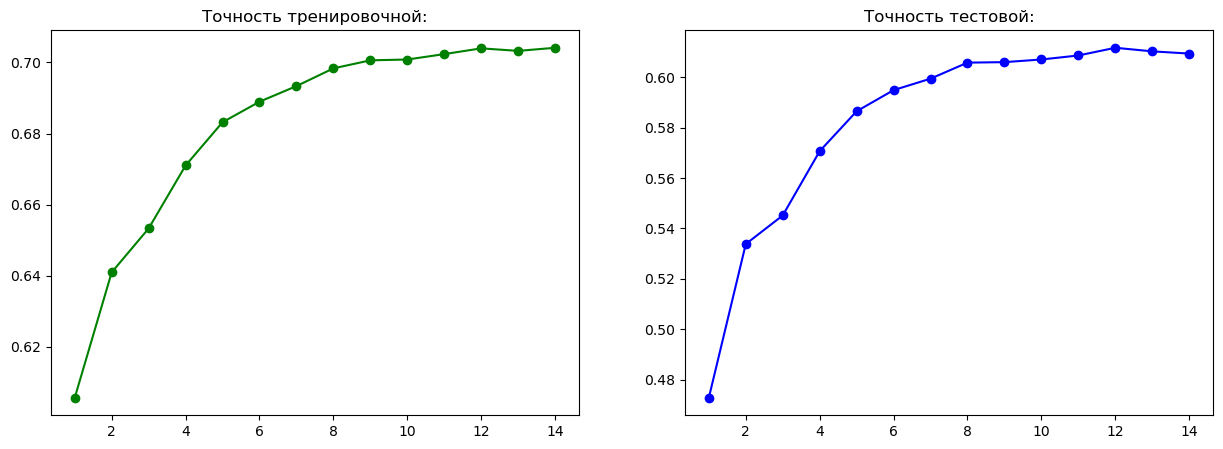

In [211]:
Graph(acc_train, acc_test, 15)

In [212]:
print("Максимальная точность на тренировочной:", np.max(acc_train), "достигается при ", np.argmax(acc_train) + 1, "компонентах")
print("Максимальная точность на тестовой:", np.max(acc_test), "достигается при ", np.argmax(acc_test) + 1, "компонентах")

Максимальная точность на тренировочной: 0.704133755467067 достигается при  14 компонентах
Максимальная точность на тестовой: 0.6117598100413699 достигается при  12 компонентах


In [213]:
acc_train_max = np.max(acc_train)
acc_test_max = np.max(acc_test)
print("При использовании PCA точность на тренировочной выборке возросла на", acc_train_max - acc_train_1, ", \n а на тестовой на", acc_test_max - acc_test_1)

При использовании PCA точность на тренировочной выборке возросла на -0.022039623996344404 , 
 а на тестовой на -0.027930772808499094


Посмотрим PCA и random forest

In [198]:
from sklearn import ensemble
forest = ensemble.RandomForestClassifier()
forest.fit(X1_train, y1_train)
y1_test_predict = forest.predict(X1_test)

acc_forest_train = 1 - np.mean(y1_train  != forest.predict(X1_train))
acc_forest_test = 1 - np.mean(y1_test  != y1_test_predict)

print("Точность тренировочной:", acc_forest_train)
print("Точность тестовой:", acc_forest_test)

Точность тренировочной: 0.9999918401984463
Точность тестовой: 0.7485006486989303


In [199]:
def PCA_ACC_RF(N, x1, y1):
    acc_train, acc_test = [], []
    for ni in range(1, N):
        pca = PCA(n_components = ni).fit_transform(x1)
        X1_train, X1_test, y1_train, y1_test = train_test_split(pca, y1, test_size = 0.25, random_state = 73)
        forest = ensemble.RandomForestClassifier().fit(X1_train, y1_train)
        acc_train.append(1 - np.mean(y1_train  != forest.predict(X1_train)))
        acc_test.append(1 - np.mean(y1_test  != forest.predict(X1_test)))
        
    return acc_train, acc_test

In [203]:
acc_train_forest, acc_test_forest = PCA_ACC_RF(15, x1, y1)

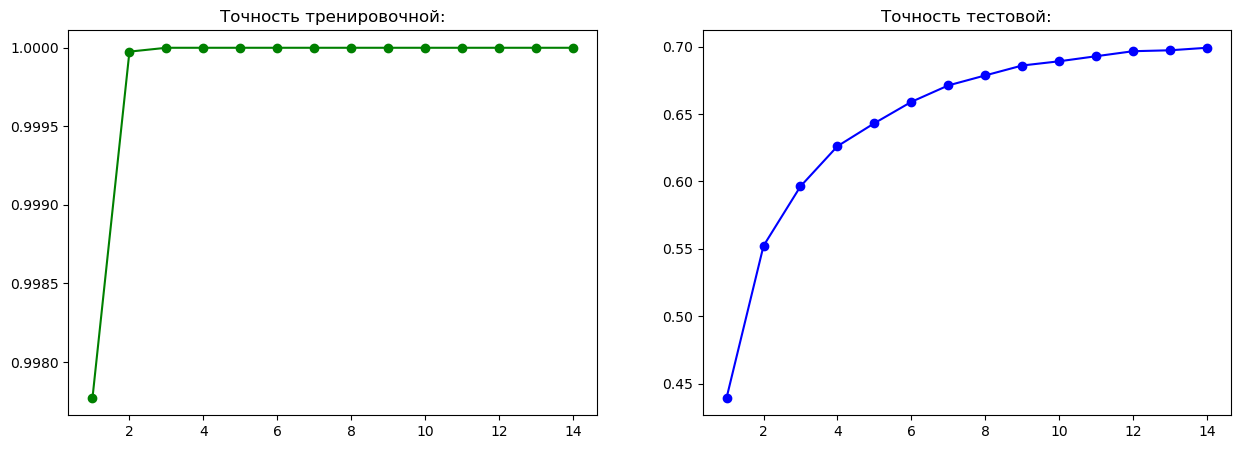

In [204]:
Graph(acc_train_forest, acc_test_forest, 15)

In [214]:
print("Максимальная точность на тренировочной:", np.max(acc_train_forest), "достигается при ", np.argmax(acc_train_forest) + 1, "компонентах")
print("Максимальная точность на тестовой:", np.max(acc_test_forest), "достигается при ", np.argmax(acc_test_forest) + 1, "компонентах")

Максимальная точность на тренировочной: 1.0 достигается при  3 компонентах
Максимальная точность на тестовой: 0.699101613179604 достигается при  14 компонентах


In [215]:
acc_train_max_forest = np.max(acc_train_forest)
acc_test_max_forest = np.max(acc_test_forest)
print("При использовании PCA точность на тренировочной выборке возросла на", acc_train_max_forest - acc_forest_train, ", \n а на тестовой на", acc_test_max_forest - acc_forest_test)

При использовании PCA точность на тренировочной выборке возросла на 8.159801553664359e-06 , 
 а на тестовой на -0.04939903551932634


***
H.Roganova 2020